In [123]:
import polars as pl
from datetime import datetime

In [124]:
df = pl.read_csv("clean_df.csv", try_parse_dates=True)

In [125]:
df = df.rename({"name" : "company"})

In [126]:
df

job_name,hours,remote,company,current employee estimate,education,seniority,city,country,job_published_at,sample_date,tags,comp_dol
str,str,str,str,i64,str,str,str,str,date,i64,str,f64
"""backend developer""","""Unclear""","""unknown""","""ibm""",274340,"""unknown""","""Unclear Seniority""","""Praha""","""Czech Republic""",2023-03-13,2023,"""Science TypeScript Horizontal …",null
"""manufacturing engineer""","""Full-Time""","""false""",null,null,"""unknown""","""Unclear Seniority""","""Sterling Heights""","""United States""",2021-10-09,2023,"""Tools Serverless Manufacturing…",null
"""design engineer, motorized pro…","""Full-Time""","""unknown""","""abi attachments""",25,"""Bachelors""","""Senior IC""","""Mishawaka""","""United States""",2023-04-28,2023,"""Design""",null
"""cybersecurity engineer""","""Full-Time""","""false""",null,null,"""Bachelors""","""Unclear Seniority""","""Herndon""","""United States""",2023-04-03,2023,"""PaaS Infrastructure Analytics …",null
"""your career so choose wisely w…","""Full-Time""","""false""","""adeeba e services""",null,"""unknown""","""Unclear Seniority""","""Kolkata""","""India""",2017-01-17,2023,"""iOS Software Runtime Storage P…",null
…,…,…,…,…,…,…,…,…,…,…,…,…
"""fire protection engineer (3+ y…","""Full-Time""","""false""","""coffman engineers""",279,"""unknown""","""Unclear Seniority""","""San Diego""","""United States""",2024-01-08,2024,"""Shortening Twitter CDN Instagr…",97500.0
"""mechanical engineering intern""","""Intern""","""unknown""","""study and work""",null,"""unknown""","""Intern""",null,null,2024-03-12,2024,"""Industrial Engineering Mechani…",null
"""automation engineer (m/f/d)""","""Unclear""","""unknown""","""novartis""",44055,"""unknown""","""Unclear Seniority""","""Puurs""","""Belgium""",null,2024,"""""",null


In [127]:
df = df.filter(pl.col("job_published_at").is_between(datetime(2020, 12, 31), datetime(2024, 4, 2)))

In [128]:
seniorities = df["seniority"].unique().to_list()

In [129]:
seniorities

['Intern',
 'Exec',
 'Senior Exec',
 'Junior IC',
 'IC',
 'Contract',
 'Chief',
 'Senior Manager',
 'Unclear Seniority',
 'Senior IC',
 'Manager',
 'Director',
 'Founder',
 'Staff IC']

In [130]:
ic = ['Staff IC','IC','Junior IC','Senior IC','Intern','Contract']
lead = ['Senior Manager','Senior Exec','Founder','Director','Chief','Manager','Exec']
unclear = ['Unclear Seniority']

In [131]:
df = df.with_columns(
    job_type=pl.when(pl.col("seniority").is_in(ic))
            .then(pl.lit("ic"))
            .when(pl.col("seniority").is_in(lead))
            .then(pl.lit("lead"))
            .otherwise(pl.lit("unclear"))
)

In [132]:
counts_2023 = df.group_by("sample_date", "job_type").len().sort(by="len").filter(pl.col("sample_date")==2023)

In [133]:
counts_2024 = df.group_by("sample_date", "job_type").len().sort(by="len").filter(pl.col("sample_date")==2024)

In [134]:
#convert to_pandas and make a pieplot or use plotly

In [135]:
import plotly.express as px

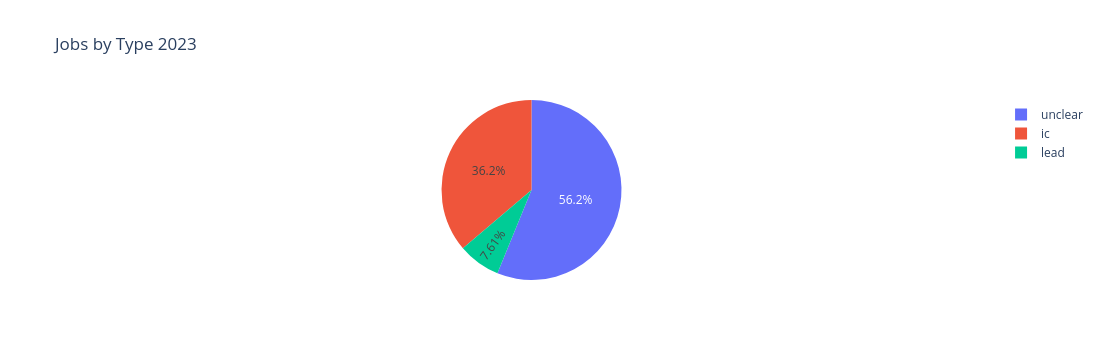

In [136]:
fig = px.pie(counts_2023, values='len', names='job_type', title='Jobs by Type 2023')
fig.show()

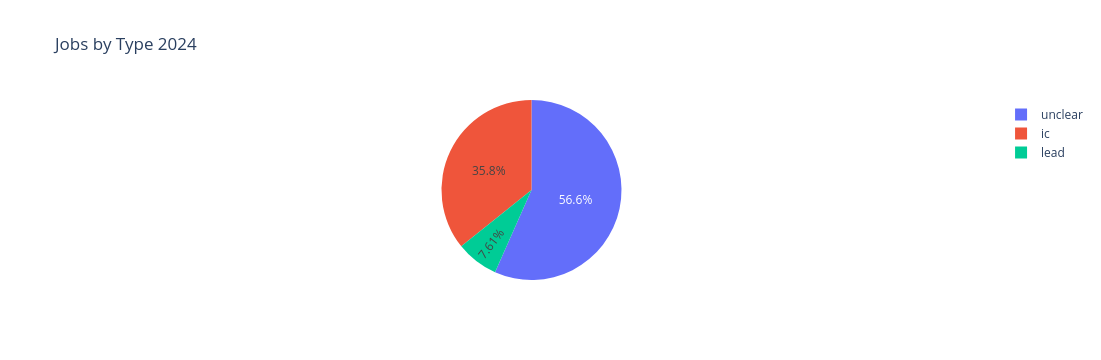

In [137]:
fig = px.pie(counts_2024, values='len', names='job_type', title='Jobs by Type 2024')
fig.show()

In [138]:
ic_roles = df.filter(pl.col("job_type")=="ic")
ic_roles

job_name,hours,remote,company,current employee estimate,education,seniority,city,country,job_published_at,sample_date,tags,comp_dol,job_type
str,str,str,str,i64,str,str,str,str,date,i64,str,f64,str
"""design engineer, motorized pro…","""Full-Time""","""unknown""","""abi attachments""",25,"""Bachelors""","""Senior IC""","""Mishawaka""","""United States""",2023-04-28,2023,"""Design""",null,"""ic"""
"""associate full stack developer…","""Unclear""","""unknown""","""ibm""",274340,"""Bachelors""","""IC""","""Singapore""","""Singapore""",2023-05-16,2023,"""Hadoop Azure Access Blockchain…",null,"""ic"""
"""senior planning and hydraulic …","""Unclear""","""unknown""","""barge design solutions""",null,"""unknown""","""Senior IC""",null,"""United States""",2023-05-02,2023,"""Design""",null,"""ic"""
"""senior architect / engineering…","""Full-Time""","""unknown""","""zenon analytics""",null,"""unknown""","""Senior IC""","""Delhi""","""India""",2023-02-22,2023,"""IaaS Java MySQL Planning Table…",null,"""ic"""
"""product manager""","""Full-Time""","""true""","""battleface""",2,"""unknown""","""Senior IC""",null,null,2023-05-12,2023,"""Travel Insurance Tourism""",null,"""ic"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""engineering technician""","""Full-Time""","""unknown""","""apex engineering group""",null,"""High School""","""Junior IC""","""Bismarck""","""United States""",2024-02-01,2024,"""No Biz Microsoft Misc Tools Cu…",null,"""ic"""
"""blockchain security engineer (…","""Contract""","""unknown""","""jump trading""",null,"""unknown""","""Contract""","""Chicago""","""United States""",2023-09-14,2024,"""CMS ChatOps Video Time Python …",250000.0,"""ic"""
"""senior cybersecurity penetrati…","""Full-Time""","""unknown""","""centre for strategic infocomm …",74,"""unknown""","""Senior IC""","""Singapore""","""Singapore""",2022-01-13,2024,"""Cybersecurity Security""",null,"""ic"""


In [139]:
ic_roles.group_by("sample_date","seniority").len().sort(by="sample_date", descending=True).plot(x="seniority", y="len", c="sample_date", alpha=0.5,legend=True, kind="bar")

:Bars   [seniority]   (len,sample_date)

In [140]:
ic_country = ic_roles.filter(pl.col("country").is_not_null())

In [141]:
ic_country.group_by("sample_date","seniority", "country").len().sort(by="country").filter(pl.col("seniority")=="Junior IC").head(100).transpose()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_63,column_64,column_65,column_66,column_67,column_68,column_69,column_70,column_71,column_72,column_73,column_74,column_75,column_76,column_77,column_78,column_79,column_80,column_81,column_82,column_83,column_84,column_85,column_86,column_87,column_88,column_89,column_90,column_91,column_92,column_93,column_94,column_95,column_96,column_97,column_98,column_99
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""2024""","""2023""","""2023""","""2023""","""2024""","""2024""","""2023""","""2023""","""2024""","""2024""","""2023""","""2024""","""2023""","""2023""","""2024""","""2024""","""2023""","""2023""","""2023""","""2024""","""2023""","""2024""","""2024""","""2023""","""2023""","""2024""","""2023""","""2023""","""2024""","""2023""","""2023""","""2023""","""2024""","""2023""","""2023""","""2024""","""2023""",…,"""2023""","""2023""","""2023""","""2024""","""2024""","""2023""","""2024""","""2024""","""2023""","""2024""","""2023""","""2023""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2024""","""2024""","""2023""","""2023""","""2024""","""2024""","""2024""","""2023""","""2023""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024"""
"""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""",…,"""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC""","""Junior IC"""
"""Argentina""","""Argentina""","""Armenia""","""Australia""","""Australia""","""Austria""","""Austria""","""Azerbaijan""","""Bangladesh""","""Belgium""","""Belgium""","""Brazil""","""Brazil""","""Bulgaria""","""Bulgaria""","""Canada""","""Canada""","""Chile""","""China""","""China""","""Colombia""","""Colombia""","""Costa Rica""","""Costa Rica""","""Croatia""","""Croatia""","""Cuba""","""Cyprus""","""Czech Republic""","""Czech Republic""","""Denmark""","""Egypt""","""Egypt""","""Estonia""","""Finland""","""France""","""France""",…,"""Lithuania""","""Luxembourg""","""Malaysia""","""Malaysia""","""Mexico""","""Mexico""","""Morocco""","""Netherlands""","""Netherlands""","""New Zealand""","""New Zealand""","""Nigeria""","""Norway""","""Norway""","""Pakistan""","""Pakistan""","""Philippines""","""Philippines""","""Poland""","""Poland""","""Portugal""","""Portugal""","""Puerto Rico""","""Qatar""","""Qatar""","""Romania""","""Romania""","""Russia""","""Saudi A

In [142]:
ic_country.group_by("sample_date","seniority", "country").len().sort(by="country").filter(pl.col("seniority")=="Intern").head(100).transpose()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_63,column_64,column_65,column_66,column_67,column_68,column_69,column_70,column_71,column_72,column_73,column_74,column_75,column_76,column_77,column_78,column_79,column_80,column_81,column_82,column_83,column_84,column_85,column_86,column_87,column_88,column_89,column_90,column_91,column_92,column_93,column_94,column_95,column_96,column_97,column_98,column_99
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""2023""","""2024""","""2023""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2024""","""2023""","""2024""","""2024""","""2023""","""2023""","""2024""","""2024""","""2023""","""2023""","""2024""","""2024""","""2024""","""2023""","""2023""",…,"""2024""","""2024""","""2023""","""2023""","""2024""","""2023""","""2024""","""2023""","""2023""","""2024""","""2024""","""2023""","""2023""","""2024""","""2023""","""2024""","""2024""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2023""","""2023""","""2024""","""2023""","""2024""","""2023""","""2024""","""2024""","""2023"""
"""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""",…,"""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern""","""Intern"""
"""Argentina""","""Australia""","""Australia""","""Austria""","""Austria""","""Bangladesh""","""Bangladesh""","""Belgium""","""Belgium""","""Brazil""","""Brazil""","""Bulgaria""","""Canada""","""Canada""","""Cayman Islands""","""Chile""","""China""","""China""","""Colombia""","""Colombia""","""Costa Rica""","""Costa Rica""","""Cuba""","""Czech Republic""","""Czech Republic""","""Denmark""","""Denmark""","""Egypt""","""Finland""","""France""","""France""","""Germany""","""Germany""","""Greece""","""Hong Kong""","""Hong Kong""","""Hungary""",…,"""Netherlands""","""New Zealand""","""New Zealand""","""Nigeria""","""Norway""","""Pakistan""","""Pakistan""","""Peru""","""Philippines""","""Philippines""","""Poland""","""Poland""","""Portugal""","""Portugal""","""Romania""","""Romania""","""Russia""","""Senegal""","""Serbia""","""Singapore""","""Singapore""","""Slovakia""","""Slovakia""","""South Africa""","""South Africa""","""South Korea""","""South Korea""","""Spain""","""Spain""","""Sri Lanka""","""Sri Lanka""","""Sweden""","""Sweden""","""Switzerland""","""Switzerland""","""Taiwan""","""Taiwan"""
"""1""","""5""","""6""","""2""","""1""","""1""","""1""","""4""","""3""","""7""",

In [143]:
df.group_by("sample_date", "seniority").agg(pl.col("comp_dol").mean()).sort(by="comp_dol").plot(x="seniority", y="comp_dol", c="sample_date",alpha=0.3, kind="bar", rot=90)

:Bars   [seniority]   (comp_dol,sample_date)

In [144]:
df.group_by("sample_date", "seniority").agg(pl.col("comp_dol").mean()).sort(by="seniority").filter(pl.col("sample_date")==2023).transpose()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13
str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""2023""","""2023""","""2023""","""2023""","""2023""","""2023""","""2023""","""2023""","""2023""","""2023""","""2023""","""2023""","""2023""","""2023"""
"""Chief""","""Contract""","""Director""","""Exec""","""Founder""","""IC""","""Intern""","""Junior IC""","""Manager""","""Senior Exec""","""Senior IC""","""Senior Manager""","""Staff IC""","""Unclear Seniority"""
"""145321.70731707316""","""76455.75""","""154777.92746003196""","""118850.42095238094""","""NaN""","""86644.50720285406""","""60319.99036144579""","""61303.67073869321""","""102915.10015065486""","""NaN""","""122140.57139057413""","""86159.83333333333""","""150077.85165791243""","""91014.7569417692"""


In [145]:
df.group_by("sample_date", "seniority").agg(pl.col("comp_dol").mean()).sort(by="seniority").filter(pl.col("sample_date")==2024).transpose()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13
str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""2024""","""2024""","""2024""","""2024""","""2024""","""2024""","""2024""","""2024""","""2024""","""2024""","""2024""","""2024""","""2024""","""2024"""
"""Chief""","""Contract""","""Director""","""Exec""","""Founder""","""IC""","""Intern""","""Junior IC""","""Manager""","""Senior Exec""","""Senior IC""","""Senior Manager""","""Staff IC""","""Unclear Seniority"""
"""154598.79619532375""","""76482.28770405898""","""171548.47535305092""","""160248.09646682654""","""NaN""","""74601.22162690676""","""61055.94689643322""","""53218.4711148539""","""102074.13653277834""","""NaN""","""135600.00234078476""","""123057.0""","""161419.77228919888""","""86802.13763276664"""


In [146]:
df.group_by("sample_date", "job_type")

In [147]:
counts_2023 = ic_roles.group_by("sample_date", "seniority").len().sort(by="len").filter(pl.col("sample_date")==2023)

In [148]:
counts_2024 = ic_roles.group_by("sample_date", "seniority").len().sort(by="len").filter(pl.col("sample_date")==2024)

In [149]:
import plotly.express as px

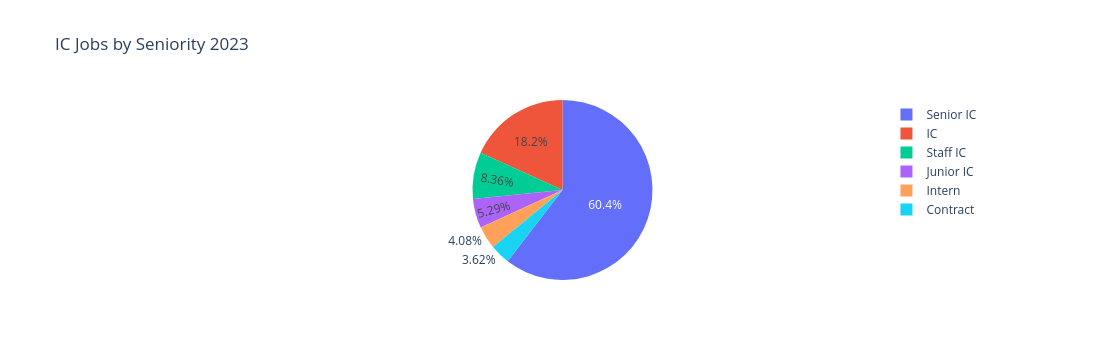

In [150]:
fig = px.pie(counts_2023, values='len', names='seniority', title='IC Jobs by Seniority 2023')
fig.show()

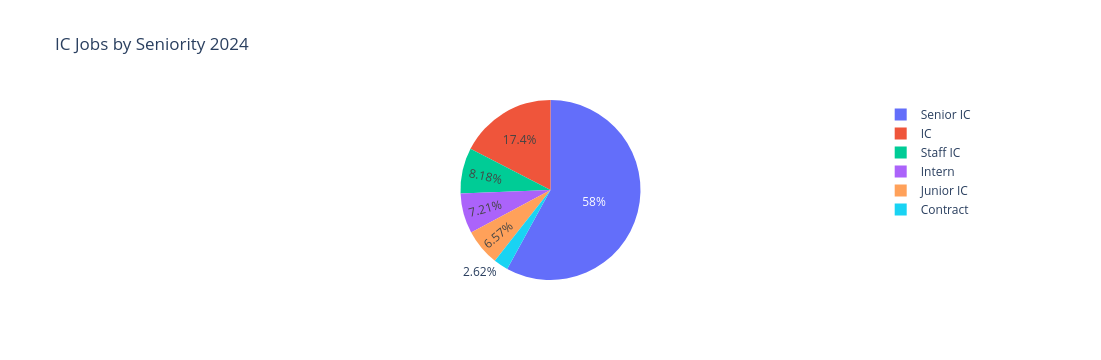

In [151]:
fig = px.pie(counts_2024, values='len', names='seniority', title='IC Jobs by Seniority 2024')
fig.show()

In [152]:
df_2023 = df.filter(pl.col("sample_date")==2023,pl.col("job_published_at").is_between(datetime(2023, 3, 9), datetime(2023, 6, 9)))

In [153]:
df_2024 = df.filter(pl.col("sample_date")==2024,pl.col("job_published_at").is_between(datetime(2024, 1, 2), datetime(2024, 4, 2)))

In [154]:
df_2023.shape

(26228, 14)

In [155]:
df_2024.shape

(29588, 14)

In [156]:
remote_ic_2023 = ic_roles.group_by("sample_date", "remote").len().sort(by="len").filter(pl.col("sample_date")==2023)
remote_ic_2024 = ic_roles.group_by("sample_date", "remote").len().sort(by="len").filter(pl.col("sample_date")==2024)

In [157]:
remote_ic_2023

sample_date,remote,len
i64,str,u32
2023,"""false""",1280
2023,"""true""",2942
2023,"""unknown""",10488


In [158]:
remote_ic_2024

sample_date,remote,len
i64,str,u32
2024,"""false""",1230
2024,"""true""",1936
2024,"""unknown""",12156


In [159]:
remote_all_2023 = df.group_by("sample_date", "remote").len().sort(by="len").filter(pl.col("sample_date")==2023)
remote_all_2024 = df.group_by("sample_date", "remote").len().sort(by="len").filter(pl.col("sample_date")==2024)

In [160]:
remote_all_2023

sample_date,remote,len
i64,str,u32
2023,"""false""",4240
2023,"""true""",6264
2023,"""unknown""",30119


In [161]:
remote_all_2024

sample_date,remote,len
i64,str,u32
2024,"""false""",3594
2024,"""true""",4397
2024,"""unknown""",34859
